In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝트/한경_MLDL_호텔리뷰/rawdata/키워드_호텔_라벨링.csv')
df.head()

,index,hotel,star,review,추천,힐링,뷰,주차,위치,깨끗,시설,친절,attitude,sum,helpful
0,0,호텔 8 Hours,5,깨끗하고 위치도 좋고 구성비 좋았습니다 다만 비품이 거의 없다고 보면 돼서 챙겨가야...,False,False,False,False,True,True,False,False,2,2,1
1,1,호텔 8 Hours,4,너무 좋아요 잘 머물다 갑니다,False,False,False,False,False,False,False,False,2,0,0
2,2,호텔 8 Hours,5,적당히 잘 쉬다 가요,False,False,False,False,False,False,False,False,2,0,0
3,3,호텔 8 Hours,5,매번 요때마다 매우 만족합니다 번창하세요,False,False,False,False,False,False,False,False,2,0,0
4,4,호텔 8 Hours,5,너무 편하고 좋았어요,False,False,False,False,False,False,False,False,2,0,0


In [ ]:
!pip install Konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 450kB 45.5MB/s 
     |████████████████████████████████| 92kB 13.2MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import konlpy
konlpy.__version__

'0.5.2'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from konlpy.tag import Okt
import tqdm.notebook as tn

In [ ]:
file = open('/content/drive/MyDrive/Colab Notebooks/프로젝트/한경_MLDL_호텔리뷰/코드/korean_stopwords.txt','r',encoding='utf-8')
stop_words = file.readlines()
stop_words = [x.strip() for x in stop_words]
stop_words[:5]

['아', '휴', '아이구', '아이쿠', '아이고']

### 한글 처리

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
text = df.review[0]
okt.morphs(text,stem=True)

['깨끗하다',
 '위치',
 '도',
 '좋다',
 '구',
 '성비',
 '좋다',
 '다만',
 '비품',
 '이',
 '거의',
 '없다',
 '보다',
 '돼다',
 '챙기다',
 '하다']

트레인 테스트 세트 나누기

In [ ]:
from sklearn.model_selection import train_test_split
X_train_df, X_test_df, y_train, y_test = train_test_split(
    df.review,df.helpful,test_size=0.2,random_state=2021
)

In [ ]:
from tqdm import tqdm_notebook

X_train = []
for sentence in tqdm_notebook(X_train_df):
    morphs = okt.morphs(sentence,stem=True)
    temp_X = ' '.join([word for word in morphs if not word in stop_words])
    X_train.append(temp_X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [ ]:
X_train[:5]

['좋다 좋다 좋다',
 '깔끔하다 좋다',
 '깔끔하다 깨끗하다',
 '직원 분들 도 친절하다 시설 도 깨끗하다 역시 5 성 급 호텔 이라는 생각 들다 별 3 개 준 이유 는 습격 미니바 때문 이다 미니바 포함 사항 잭 대니엘 코냑 포함 되어다 막상 보다 한 모금 도 안되다 향수병 만 한 잭 대니엘 코냑 속 았 달다 기분 들어서다 썩 기분 좋다 않다 상세 설명 해당 음료 정확하다 용량 표시 하다 필요하다 보이다',
 '항상 쾌적하다']

In [ ]:
X_test = []
for sentence in tqdm_notebook(X_test_df):
    morphs = okt.morphs(sentence,stem=True)
    temp_X = ' '.join([word for word in morphs if not word in stop_words])
    X_test.append(temp_X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
X_test[:5]

['위치 다 좋다 깔끔하다 샴푸 바디 워시 향 은 개인 적 별로 에요 포근하다 푹 자다 쉬 고 오다 주 차비 만원 넘다 나오다 가시다 분 감안 하다 영등포 위치 는 최고 좋다 조용하다 쉬다 기도 좋다 깔끔하다 좋아하다 추천',
 '좋다',
 '부티크 호텔 이라 방 마다 편차 크다 듯',
 '베스트 오브 베스트 ㅋㅋㅋㅋ',
 '욕조 없다 아쉽다 사진 보이다 방 사이즈 크다 티백 도 신경 써다 고르다 기분 좋다 생수 도 부족하다 프론트 무료 더 주 고요 더 보기']

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
max_words = 30000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train[:3]

[[1, 1, 1], [13, 1], [13, 8]]

In [ ]:
# 전체 데이터의 길이 분포
print('최대 길이 : ', max(len(l) for l in X_train))
print('평균 길이 : ', sum(map(len,X_train)) / len(X_train))

최대 길이 :  224
평균 길이 :  16.019538602968


In [ ]:
max_len = 30
X_train = pad_sequences(X_train,maxlen=max_len)
X_test = pad_sequences(X_test,maxlen = max_len)

In [ ]:
model = Sequential([
                    Embedding(max_words,100),
                    LSTM(128),
                    Dense(1,activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         3000000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 3,117,377
Trainable params: 3,117,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mc = ModelCheckpoint('hotel_lstm_best.h5',save_best_only=True)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=60, epochs=4, callbacks=[mc] )

Epoch 1/4
1828/1828 [==============================] - 66s 31ms/step - loss: 0.1309 - accuracy: 0.9446 - val_loss: 0.1021 - val_accuracy: 0.9527
Epoch 2/4
1828/1828 [==============================] - 56s 31ms/step - loss: 0.0908 - accuracy: 0.9604 - val_loss: 0.0988 - val_accuracy: 0.9541
Epoch 3/4
1828/1828 [==============================] - 53s 29ms/step - loss: 0.0768 - accuracy: 0.9669 - val_loss: 0.1084 - val_accuracy: 0.9529
Epoch 4/4
1828/1828 [==============================] - 53s 29ms/step - loss: 0.0610 - accuracy: 0.9741 - val_loss: 0.1213 - val_accuracy: 0.9502


In [ ]:
best_model = load_model('hotel_lstm_best.h5')
best_model.evaluate(X_test, y_test)

1071/1071 [==============================] - 4s 3ms/step - loss: 0.0981 - accuracy: 0.9545


[0.09813550859689713, 0.9544737935066223]

In [ ]:
import seaborn as sns

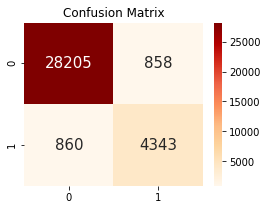

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = np.round(y_pred,0))

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()




---



In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
model2 = Sequential([
                    Embedding(max_words,100),
                    LSTM(256),
                    Dense(1,activation="sigmoid")
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         3000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 3,365,825
Trainable params: 3,365,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train, validation_split=0.2, batch_size=60, epochs=4)

Epoch 1/4
1828/1828 [==============================] - 60s 32ms/step - loss: 0.1326 - accuracy: 0.9440 - val_loss: 0.1041 - val_accuracy: 0.9515
Epoch 2/4
1828/1828 [==============================] - 57s 31ms/step - loss: 0.0922 - accuracy: 0.9601 - val_loss: 0.0986 - val_accuracy: 0.9544
Epoch 3/4
1828/1828 [==============================] - 57s 31ms/step - loss: 0.0779 - accuracy: 0.9668 - val_loss: 0.1094 - val_accuracy: 0.9531
Epoch 4/4
1828/1828 [==============================] - 57s 31ms/step - loss: 0.0619 - accuracy: 0.9740 - val_loss: 0.1217 - val_accuracy: 0.9520


In [ ]:
model2.evaluate(X_test, y_test)

1071/1071 [==============================] - 4s 3ms/step - loss: 0.1237 - accuracy: 0.9512


[0.12370797991752625, 0.9512052536010742]

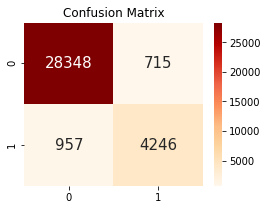

In [ ]:
y_pred = model2.predict(X_test)

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = np.round(y_pred,0))

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()



---



In [ ]:
from tensorflow.keras.layers import Conv1D, Dropout, MaxPooling1D,GRU

In [ ]:
model3 = Sequential([
    Embedding(max_words,100),
    Dropout(0.5),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=4),
    GRU(60),
    Dense(1, activation='sigmoid')
])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 100)         3000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
gru (GRU)                    (None, 60)                22680     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 3,054,805
Trainable params: 3,054,805
Non-trainable params: 0
____________________________________________

In [ ]:
model3.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model3.fit(X_train, y_train, validation_split=0.2, batch_size=100, epochs=10, )

Epoch 1/10
1097/1097 [==============================] - 61s 30ms/step - loss: 0.2110 - accuracy: 0.9152 - val_loss: 0.1777 - val_accuracy: 0.9285
Epoch 2/10
1097/1097 [==============================] - 32s 29ms/step - loss: 0.1602 - accuracy: 0.9374 - val_loss: 0.1715 - val_accuracy: 0.9317
Epoch 3/10
1097/1097 [==============================] - 32s 29ms/step - loss: 0.1421 - accuracy: 0.9462 - val_loss: 0.1825 - val_accuracy: 0.9304
Epoch 4/10
1097/1097 [==============================] - 32s 29ms/step - loss: 0.1262 - accuracy: 0.9536 - val_loss: 0.1901 - val_accuracy: 0.9249
Epoch 5/10
1097/1097 [==============================] - 32s 29ms/step - loss: 0.1132 - accuracy: 0.9595 - val_loss: 0.1995 - val_accuracy: 0.9250
Epoch 6/10
1097/1097 [==============================] - 32s 29ms/step - loss: 0.1023 - accuracy: 0.9644 - val_loss: 0.2155 - val_accuracy: 0.9262
Epoch 7/10
1097/1097 [==============================] - 32s 29ms/step - loss: 0.0922 - accuracy: 0.9689 - val_loss: 0.2279 -

In [ ]:
model3.evaluate(X_test, y_test)

1071/1071 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9204


[0.2836180329322815, 0.9203875660896301]



---



In [ ]:
import re
from konlpy.tag import Okt
from collections import Counter

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

okt = Okt()
nouns = okt.nouns(apply_regular_expression(df['review'][0]))
corpus = "".join(df['review'].tolist())
nouns = okt.nouns(apply_regular_expression(corpus))


In [ ]:
counter = Counter(nouns)
counter.most_common(10)

In [ ]:
# 한글자 명사 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

In [ ]:
stop_words[:5]

In [ ]:
# Bow 벡터 생성

from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stop_words]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['review'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [ ]:
bow_vect.toarray()
bow_vect.shape

In [ ]:
word_count_dict = dict(zip(word_list, count_list))

In [ ]:
# TF-IDF 적용
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

print(tf_idf_vect.shape)

In [ ]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])
